In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
# general gradient function
def grad(f): 
    def grad_help(*args):
        h = 1e-5
        dim = len(args)
        return [(f(*[args[j] + (h if j == i else 0) for j in range(dim)]) -
                f(*[args[j] - (h if j == i else 0) for j in range(dim)]))/(2*h)
                for i in range(dim)]
    return grad_help

In [3]:
# example
def f(x, y): 
    return np.sin(0.5 * x**2 - 0.25 * y**2 + 3)*np.cos(2*x+1-np.exp(y))

In [4]:
# gradient descent
lr = 0.2
epoch = 30
x = [-0.1, -0.4]

points = np.zeros((epoch, 2))
points[0] = x
for i in range(1, epoch):
    x = x - lr * np.array(grad(f)(x[0], x[1]))
    points[i] = x

-0.03763185463977272


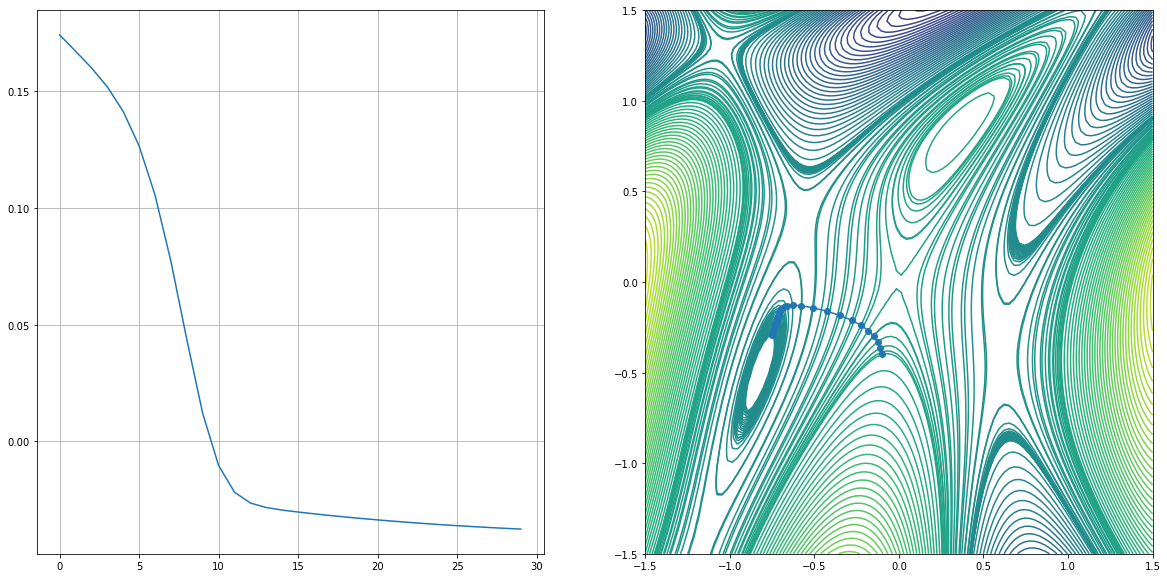

In [5]:
# plotting
t = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(t, t)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(f(points[:, 0], points[:, 1]))
ax1.grid()
ax2.plot(points[:, 0], points[:, 1], 'o-')
ax2.contour(X, Y, f(X, Y), levels=sorted([f(p[0], p[1]) for p in points] + list(np.linspace(-1, 1, 100))))
print(f(points[-1, 0], points[-1, 1]))